In [1]:
%pip install --quiet pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
exp_dict = {
    "a2c": {
        "return": [],
        "gamma": [],
    },
    "mgrl": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "bootstrap": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "mgrl_outer_critic": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "bootstrap_outer_critic": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
}
for agent in ["a2c", "mgrl", "mgrl_outer_critic", "bootstrap", "bootstrap_outer_critic"]:
    for data in ["return", "bias", "gamma"]:
        if agent == "a2c" and data == "bias": continue
        df_list = []
        name = f"snake/data/{agent}_{data}"
        for i, file in enumerate(os.listdir(name)):
            if i == 0:
                steps = pd.read_csv(os.path.join(name, file), names=["steps", "time", f"Value_{i}"])["steps"]
            df_list.append(pd.read_csv(os.path.join(name, file), names=["steps", "time", f"Value_{i}"]).drop(["steps", "time"], axis=1))
        exp_dict[agent][data] = pd.concat(df_list, axis=1)

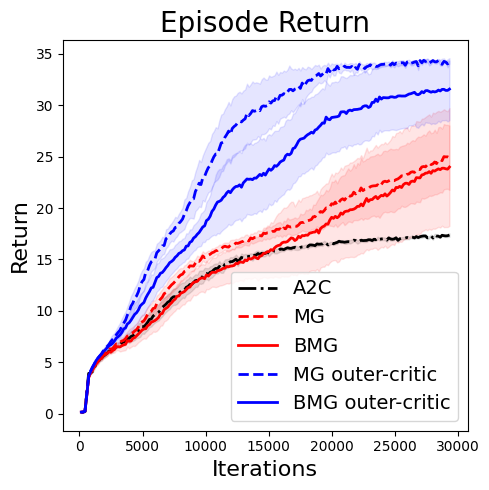

In [4]:
plt.figure(figsize=(5, 5))
metadata = {
    "a2c": ("A2C", "black", "-."),
    "mgrl": ("MG", "red", "--"),
    "mgrl_outer_critic": ("MG outer-critic", "blue", "--"),
    "bootstrap": ("BMG", "red", "-"),
    "bootstrap_outer_critic": ("BMG outer-critic", "blue", "-"),
}
for agent, agent_dict in exp_dict.items():
    label, color, linestyle = metadata[agent]
    return_mean = agent_dict["return"].mean(axis=1)
    return_std = agent_dict["return"].std(axis=1)
    plt.plot(steps[1:], return_mean, label=label, c=color, linestyle=linestyle, linewidth=2)
    plt.fill_between(steps[1:], return_mean + 0.5*return_std, return_mean - 0.5*return_std, alpha=0.1, color=color)
plt.ylabel("Return", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Episode Return", fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("plots/snake/snake_return.png", dpi=300, bbox_inches="tight")

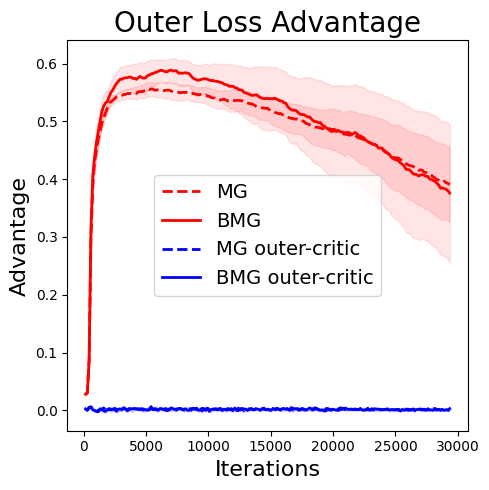

In [5]:
plt.figure(figsize=(5, 5))
metadata = {
    "a2c": ("A2C", "black", "-."),
    "mgrl": ("MG", "red", "--"),
    "mgrl_outer_critic": ("MG outer-critic", "blue", "--"),
    "bootstrap": ("BMG", "red", "-"),
    "bootstrap_outer_critic": ("BMG outer-critic", "blue", "-"),
}
for agent, agent_dict in exp_dict.items():
    if agent == "a2c": continue
    label, color, linestyle = metadata[agent]
    bias_mean = agent_dict["bias"].mean(axis=1)
    bias_std = agent_dict["bias"].std(axis=1)
    plt.plot(steps[1:], bias_mean, label=label, c=color, linestyle=linestyle, linewidth=2)
    plt.fill_between(steps[1:], bias_mean + 0.5*bias_std, bias_mean - 0.5*bias_std, alpha=0.1, color=color)
plt.ylabel("Advantage", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Outer Loss Advantage", fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("plots/snake/snake_outer_loss_advantage.png", dpi=300, bbox_inches="tight")

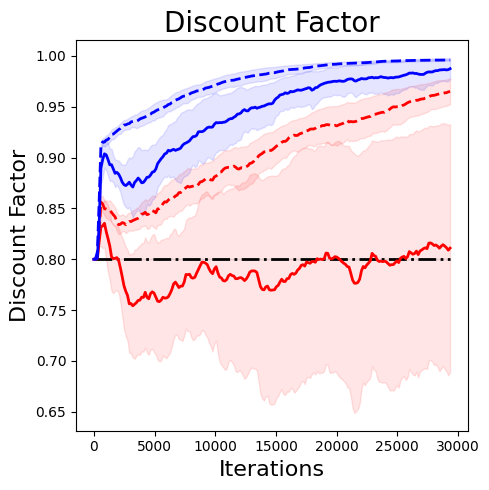

In [6]:
plt.figure(figsize=(5, 5))
metadata = {
    "a2c": ("A2C", "black", "-."),
    "mgrl": ("MG", "red", "--"),
    "mgrl_outer_critic": ("MG outer-critic", "blue", "--"),
    "bootstrap": ("BMG", "red", "-"),
    "bootstrap_outer_critic": ("BMG outer-critic", "blue", "-"),
}
for agent, agent_dict in exp_dict.items():
    label, color, linestyle = metadata[agent]
    gamma_mean = agent_dict["gamma"].mean(axis=1)
    gamma_std = agent_dict["gamma"].std(axis=1)
    plt.plot(steps, gamma_mean, label=label, c=color, linestyle=linestyle, linewidth=2)
    plt.fill_between(steps, gamma_mean + 0.5*gamma_std, gamma_mean - 0.5*gamma_std, alpha=0.1, color=color)
plt.ylabel("Discount Factor", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Discount Factor", fontsize=20)
plt.tight_layout()
plt.savefig("plots/snake/snake_discount_factor.png", dpi=300, bbox_inches="tight")

## Appendix - advantage normalization

In [7]:
exp_dict = {
    "a2c_no_norm": {
        "return": [],
        "gamma": [],
    },
    "a2c_norm": {
        "return": [],
        "gamma": [],
    },
    "mgrl_no_outer_no_norm": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "mgrl_no_outer_norm": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "bootstrap_no_outer_no_norm": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "bootstrap_no_outer_norm": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "mgrl_outer_no_norm": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "mgrl_outer_norm": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "bootstrap_outer_no_norm": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
    "bootstrap_outer_norm": {
        "return": [],
        "bias": [],
        "gamma": [],
    },
}
for agent in exp_dict.keys():
    for data in ["return", "bias", "gamma"]:
        if "a2c" in agent and data == "bias": continue
        file_name = f"snake/data/appendix/{data}/{data}_{agent}.csv"
        exp_dict[agent][data] = pd.read_csv(file_name, names=["steps", "time", "Value"]).drop(["steps", "time"], axis=1)
steps = pd.read_csv("snake/data/appendix/return/return_a2c_norm.csv", names=["steps", "time", f"Value"])["steps"]

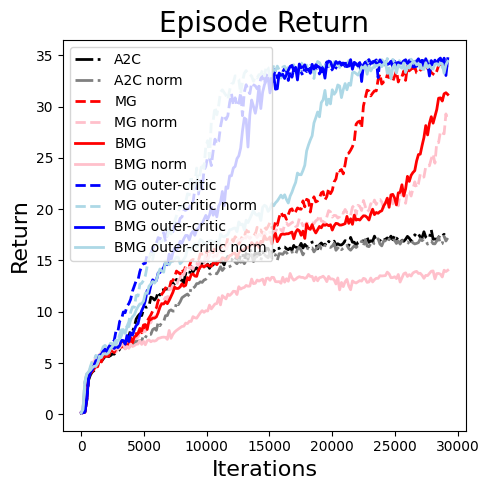

In [8]:
plt.figure(figsize=(5, 5))
metadata = {
    "a2c_no_norm": ("A2C", "black", "-.", None),
    "a2c_norm": ("A2C norm", "grey", "-.", None),
    "mgrl_no_outer_no_norm": ("MG", "red", "--", None),
    "mgrl_no_outer_norm": ("MG norm", "pink", "--", None),
    "mgrl_outer_no_norm": ("MG outer-critic", "blue", "--", None),
    "mgrl_outer_norm": ("MG outer-critic norm", "lightblue", "--", None),
    "bootstrap_no_outer_no_norm": ("BMG", "red", "-", None),
    "bootstrap_no_outer_norm": ("BMG norm", "pink", "-", None),
    "bootstrap_outer_no_norm": ("BMG outer-critic", "blue", "-", None),
    "bootstrap_outer_norm": ("BMG outer-critic norm", "lightblue", "-", None),
}
for agent, agent_dict in exp_dict.items():
    label, color, linestyle, marker = metadata[agent]
    plt.plot(steps, agent_dict["return"], label=label, c=color, linestyle=linestyle, linewidth=2, marker=marker)
plt.ylabel("Return", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Episode Return", fontsize=20)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig("plots/snake/snake_return_appendix.png", dpi=300, bbox_inches="tight")

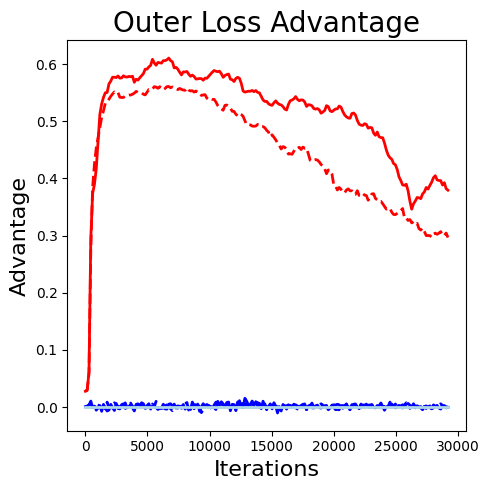

In [9]:
plt.figure(figsize=(5, 5))
metadata = {
    "a2c_no_norm": ("A2C", "black", "-.", None),
    "a2c_norm": ("A2C norm", "grey", "-.", None),
    "mgrl_no_outer_no_norm": ("MG", "red", "--", None),
    "mgrl_no_outer_norm": ("MG norm", "pink", "--", None),
    "mgrl_outer_no_norm": ("MG outer-critic", "blue", "--", None),
    "mgrl_outer_norm": ("MG outer-critic norm", "lightblue", "--", None),
    "bootstrap_no_outer_no_norm": ("BMG", "red", "-", None),
    "bootstrap_no_outer_norm": ("BMG norm", "pink", "-", None),
    "bootstrap_outer_no_norm": ("BMG outer-critic", "blue", "-", None),
    "bootstrap_outer_norm": ("BMG outer-critic norm", "lightblue", "-", None),
}
for agent, agent_dict in exp_dict.items():
    if "a2c" in agent: continue
    label, color, linestyle, _ = metadata[agent]
    plt.plot(steps, agent_dict["bias"], label=label, c=color, linestyle=linestyle, linewidth=2)
plt.ylabel("Advantage", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Outer Loss Advantage", fontsize=20)
plt.tight_layout()
plt.savefig("plots/snake/snake_outer_loss_advantage_appendix.png", dpi=300, bbox_inches="tight")

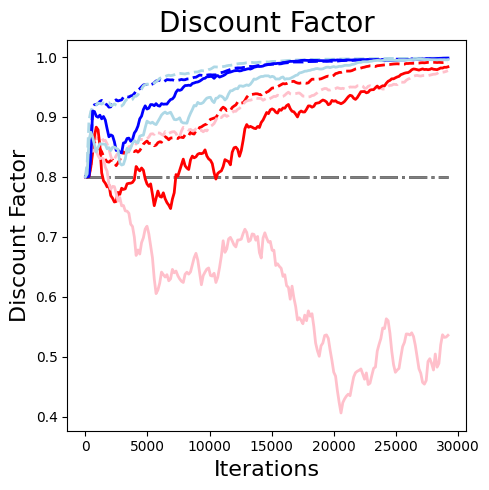

In [10]:
plt.figure(figsize=(5, 5))
metadata = {
    "a2c_no_norm": ("A2C", "black", "-.", None),
    "a2c_norm": ("A2C norm", "grey", "-.", None),
    "mgrl_no_outer_no_norm": ("MG", "red", "--", None),
    "mgrl_no_outer_norm": ("MG norm", "pink", "--", None),
    "mgrl_outer_no_norm": ("MG outer-critic", "blue", "--", None),
    "mgrl_outer_norm": ("MG outer-critic norm", "lightblue", "--", None),
    "bootstrap_no_outer_no_norm": ("BMG", "red", "-", None),
    "bootstrap_no_outer_norm": ("BMG norm", "pink", "-", None),
    "bootstrap_outer_no_norm": ("BMG outer-critic", "blue", "-", None),
    "bootstrap_outer_norm": ("BMG outer-critic norm", "lightblue", "-", None),
}
for agent, agent_dict in exp_dict.items():
    label, color, linestyle, _ = metadata[agent]
    plt.plot(steps, agent_dict["gamma"][:-1], label=label, c=color, linestyle=linestyle, linewidth=2)
plt.ylabel("Discount Factor", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.title("Discount Factor", fontsize=20)
plt.tight_layout()
plt.savefig("plots/snake/snake_discount_factor_appendix.png", dpi=300, bbox_inches="tight")